In [6]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from simfunctions import *

# Malware Propagation Model

Density model:

$$ x \to x+1/N, N(1-x)(1+x) $$
$$ x \to x-1/N, Nx $$

No-density:

$$ X \to X+1, (1/N)(N-X)(N+X) $$
$$ x \to x-1, X $$

In [7]:
def rate1(X):
    rate = (1/N)*(N-X[0])*(N+X[0])
    if rate > 0:
        return rate
    else:
        return 0

def rate2(X):
    rate = X[0]
    if rate > 0:
        return rate
    else:
        return 0
    
# Model Parameters
N=10
drift = [rate1, rate2]
S_matrix = np.array([[1], [-1]])  # Stoichiometry matrix
c = np.array([1, 1])  # Reaction rates
X0 = np.array([6])  # Initial state
T = 6  # Total time


## SSA

In [8]:
n_runs = 100
runs = []

for run in range(n_runs):
    if 100*run/n_runs % 10 == 0:
        print(100*run/n_runs, '% simulations completed')
    X = None
    while X is None:
        X, t_ssa = next_reaction(drift, S_matrix, c, X0, T)
    runs.append(X)
    
x_ssa = np.mean(np.array(runs), axis=0)

np.savetxt('X_SSA10', x_ssa)
np.savetxt('T_SSA10', t_ssa)

0.0 % simulations completed
10.0 % simulations completed
20.0 % simulations completed


C:\Users\birik\github\SOGA4SSA\src\simfunctions.py:25: RuntimeWarning: divide by zero encountered in divide
  rand_vars = np.random.exponential(1 / a)


30.0 % simulations completed
40.0 % simulations completed
50.0 % simulations completed
60.0 % simulations completed
70.0 % simulations completed
80.0 % simulations completed
90.0 % simulations completed


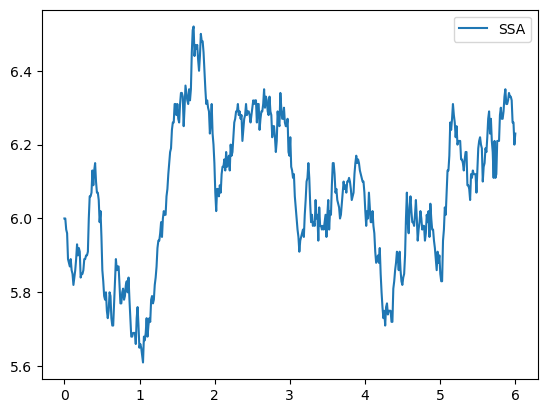

In [9]:
x_ssa = np.loadtxt('X_SSA10')
t_ssa = np.loadtxt('T_SSA10')

plt.plot(t_ssa, x_ssa, label='SSA')
plt.legend()



## Tau Leaping

In [10]:
tau = 0.05  # Leap size

n_runs = 10000
runs = []

for run in range(n_runs):
    if 100*run/n_runs % 10 == 0:
        print(100*run/n_runs, '% simulations completed')
    X = None
    while X is None:
        X, t_tau = tau_leaping(drift, S_matrix, c, X0, T, tau)
    runs.append(X)
       
print('Number of steps: ', len(X))

x_tau = np.mean(np.array(runs)[:,:,0], axis=0)

np.savetxt('X_tau', x_tau)
np.savetxt('T_tau', t_tau)

0.0 % simulations completed
10.0 % simulations completed
20.0 % simulations completed
30.0 % simulations completed
40.0 % simulations completed
50.0 % simulations completed
60.0 % simulations completed
70.0 % simulations completed
80.0 % simulations completed
90.0 % simulations completed
Number of steps:  121


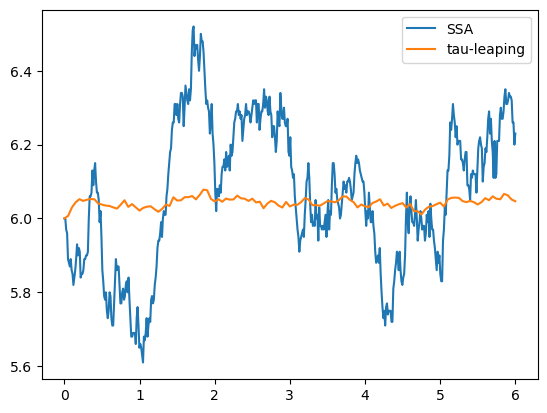

In [11]:
x_tau = np.loadtxt('X_tau')
t_tau = np.loadtxt('T_tau')

plt.plot(t_ssa, x_ssa, label='SSA')
plt.plot(t_tau, x_tau, label='tau-leaping')
plt.legend()

## Mean-field

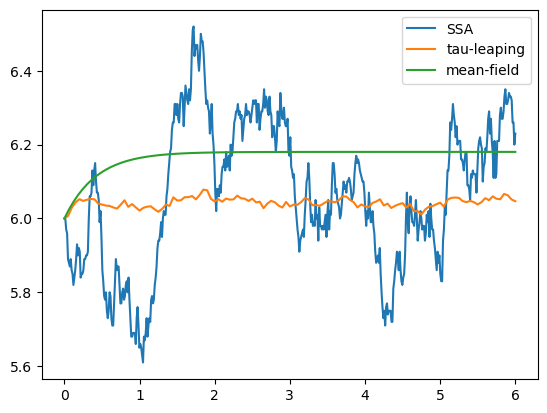

In [12]:
t_mf = np.linspace(0,T, 100)
x_mf = mean_field(drift,S_matrix,c,X0,t_mf)

plt.plot(t_ssa, x_ssa, label='SSA')
plt.plot(t_tau, x_tau, label='tau-leaping')
plt.plot(t_mf, x_mf[:,0], label='mean-field')
plt.legend()


## SOGA - Gaussian Approx.

In [13]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *

compiledFile=compile2SOGA('../programs/SOGA/SSA/MP10.soga')
cfg = produce_cfg(compiledFile)
start = time()
output_dist = start_SOGA(cfg)
end = time()

print('Computed in {}s'.format(np.round(end-start,3)))

it. [None] mean rate1 0.0 mean rate2 0.0 var rate1 0.0 var rate2 0.0
it. [1] mean rate1 0.31999999997747 mean rate2 0.29999999998794524 var rate1 0.565685424756471 var rate2 0.5477225573984225
it. [2] mean rate1 0.31569799996295456 mean rate2 0.3009999999759106 var rate1 0.5638830768621768 var rate2 0.5500454524581944
it. [3] mean rate1 0.3117102213463149 mean rate2 0.3017349093325485 var rate1 0.5624096380971582 var rate2 0.5521197256603361
it. [4] mean rate1 0.3080384646224765 mean rate2 0.3022351547459799 var rate1 0.5612507879235827 var rate2 0.5539754880830768
it. [5] mean rate1 0.30481980918952456 mean rate2 0.3025436290786337 var rate1 0.5604775042028493 var rate2 0.5556496234146777


C:\Users\birik\github\SOGA4SSA\src\libSOGAupdate.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  pois_it[k_val] = 1 - norm.cdf(-muprime/pois_sigma)
C:\Users\birik\github\SOGA4SSA\src\libSOGAupdate.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  pois_it[k_val] = muprime*pois_it[k_val-1] + pois_sigma*norm.pdf(-muprime/pois_sigma)


it. [6] mean rate1 0.3022386543433559 mean rate2 0.30273429012195197 var rate1 0.560191671815675 var rate2 0.5571993350905982
it. [7] mean rate1 0.3003740366888651 mean rate2 0.30289737136392336 var rate1 0.5604298878315414 var rate2 0.558693095884005
it. [8] mean rate1 0.29919713332642617 mean rate2 0.30311214807156334 var rate1 0.5611613570230872 var rate2 0.5601918380930861
it. [9] mean rate1 0.2986263714427638 mean rate2 0.30343438720308824 var rate1 0.5623229595521095 var rate2 0.5617397519390661
it. [10] mean rate1 0.2985682096600602 mean rate2 0.3038967969567793 var rate1 0.5638455482813857 var rate2 0.563364219636574
it. [11] mean rate1 0.2989362434463576 mean rate2 0.3045144448826378 var rate1 0.5656662825565522 var rate2 0.5650794537070027
it. [12] mean rate1 0.2996573808101581 mean rate2 0.3052905517562294 var rate1 0.5677324789606115 var rate2 0.5668905731757085
it. [13] mean rate1 0.3006722044748925 mean rate2 0.30622109246498047 var rate1 0.5700016144886494 var rate2 0.56

it. [74] mean rate1 0.5468593336449149 mean rate2 0.4832041980804437 var rate1 0.8497380048853247 var rate2 0.7594952533939472
it. [75] mean rate1 0.5544007794797969 mean rate2 0.4879144884810975 var rate1 0.8574189361592284 var rate2 0.7638256877064672
it. [76] mean rate1 0.5621462747073529 mean rate2 0.4927230257915136 var rate1 0.8652831021874973 var rate2 0.7682236764125031
it. [77] mean rate1 0.5701041889347573 mean rate2 0.49763368186852874 var rate1 0.8733378121248526 var rate2 0.7726917404508155
it. [78] mean rate1 0.5782833261178786 mean rate2 0.5026505206899086 var rate1 0.8815907334363848 var rate2 0.7772325056666568
it. [79] mean rate1 0.5866929508115541 mean rate2 0.5077778095718587 var rate1 0.8900499121418641 var rate2 0.7818487081842962
it. [80] mean rate1 0.5953428161221614 mean rate2 0.513020031187587 var rate1 0.8987237941208456 var rate2 0.7865432001026607
it. [81] mean rate1 0.604243193460503 mean rate2 0.5183818964407321 var rate1 0.907621247498097 var rate2 0.791

In [14]:
x_soga = np.zeros(len(t_tau))
std_soga = np.zeros(len(t_tau))

for i in range(len(t_tau)):
    idx = output_dist.var_list.index('X[{}]'.format(i))
    x_soga[i] = output_dist.gm.mean()[idx]
    std_soga[i] = np.sqrt(output_dist.gm.cov()[idx,idx])

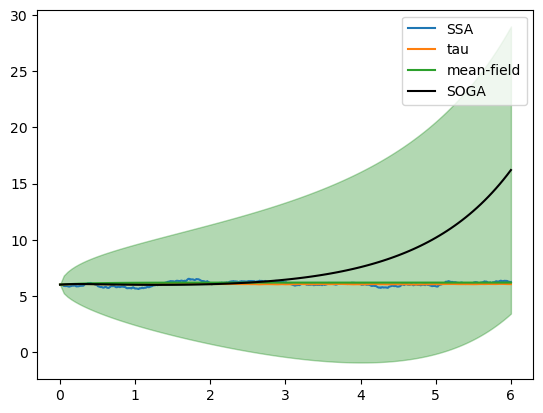

In [19]:
plt.plot(t_ssa, x_ssa, label='SSA')
plt.plot(t_tau, x_tau, label='tau')
plt.plot(t_mf, x_mf[:,0], label='mean-field')
plt.plot(t_tau, x_soga, label='SOGA', color='black')
plt.fill_between(t_tau, x_soga-std_soga, x_soga+std_soga ,alpha=0.3, color='green')
plt.legend()
#plt.xlim(0,3)
#plt.ylim(5.8,6.5)